<a href="https://colab.research.google.com/github/bubblebolt/dads/blob/main/DADS6003/House%20Prices/6610412002_ASM1_HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing libraries

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

In [278]:
#Import Data
house = pd.read_csv('https://raw.githubusercontent.com/bubblebolt/dads/main/DADS6003/House%20Prices/Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [279]:
# Data Shape
house.shape

(545, 13)

In [280]:
# Data Information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [281]:
#Decribe Data
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# 3. Exploratory Data Analysis¶

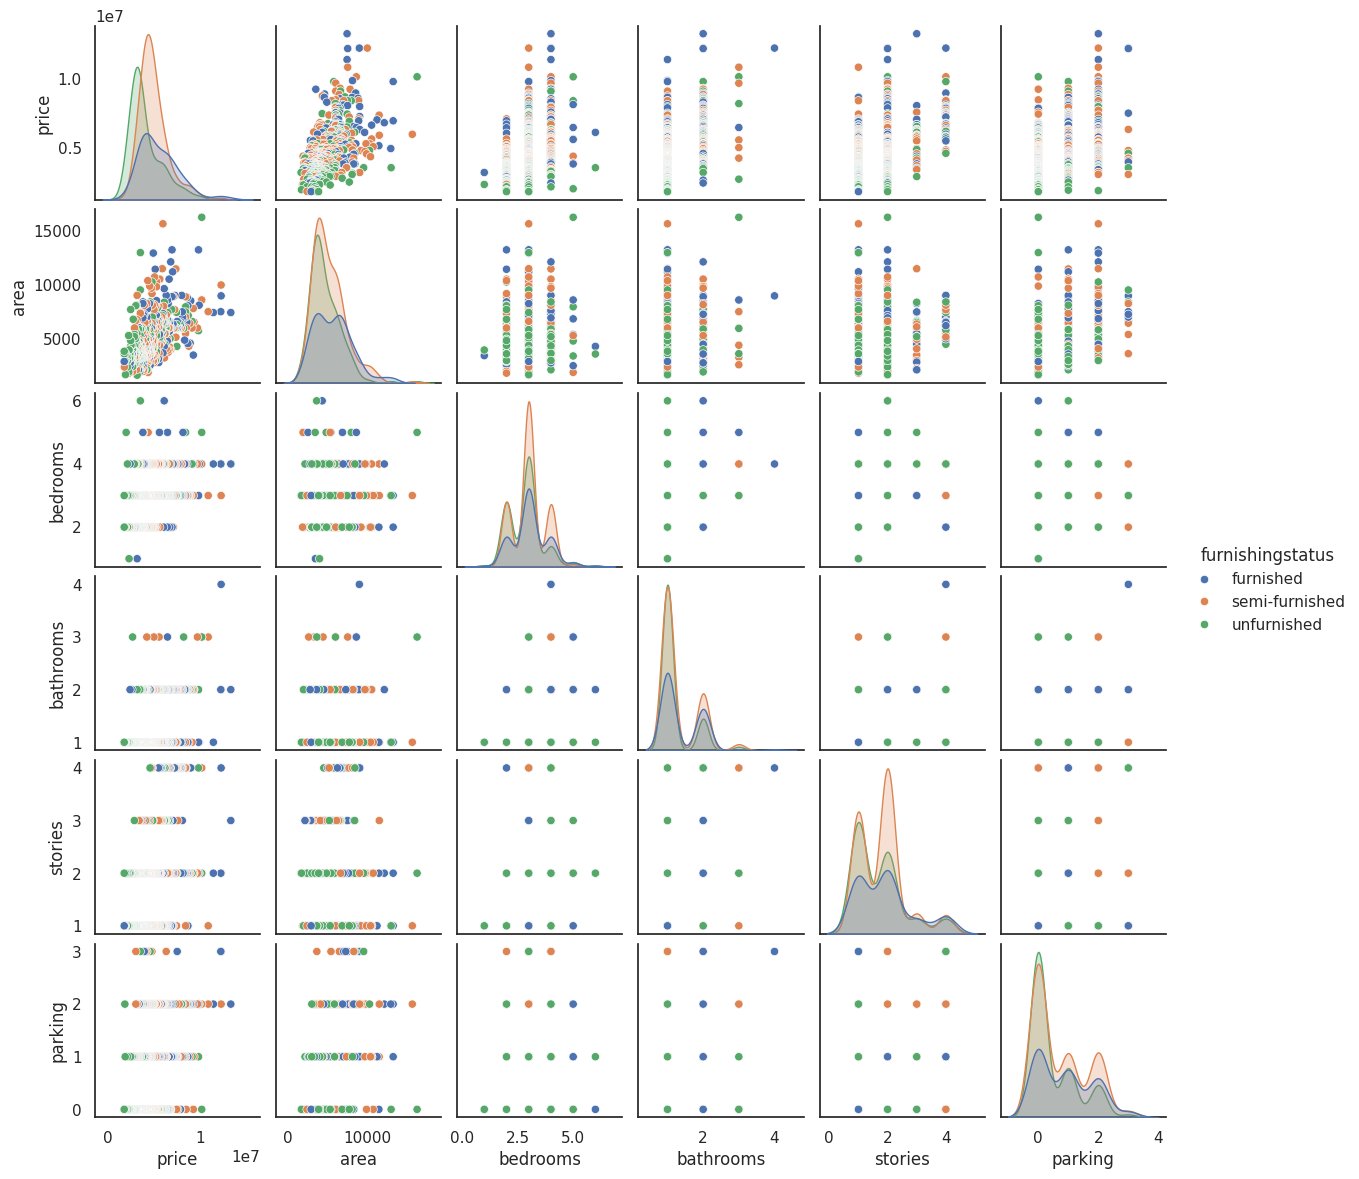

In [282]:
#Pair Plot
sns.pairplot(house, hue='furnishingstatus', height=2)

<ipython-input-283-d7070f2bc166>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = house.corr()


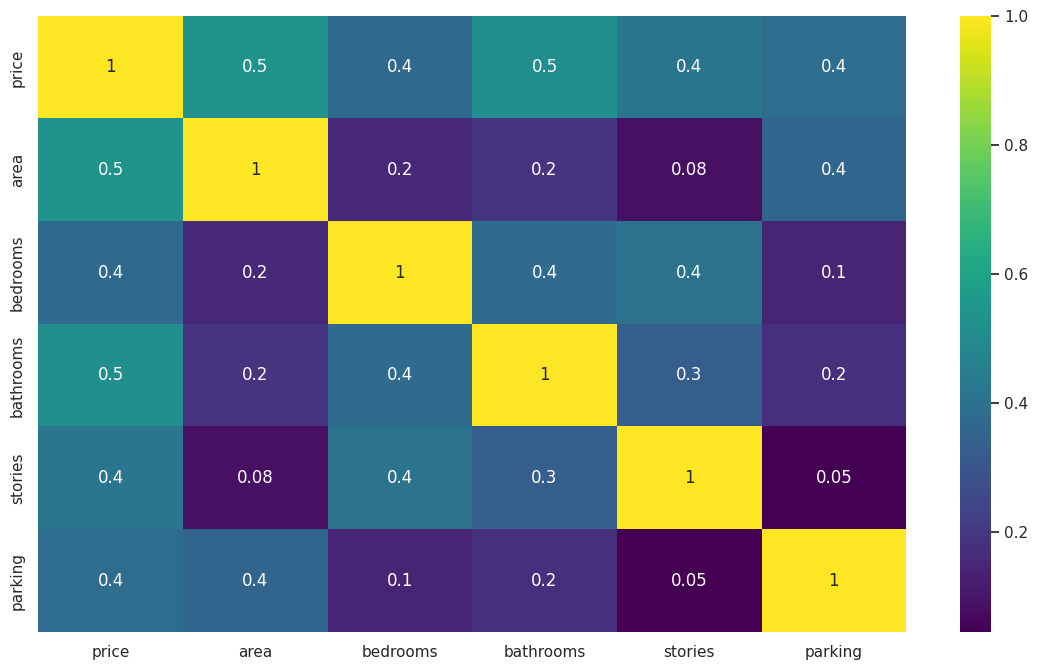

In [283]:
#Heatmap of Correlation
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = house.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="viridis", fmt='.1g')

<Axes: xlabel='area', ylabel='price'>

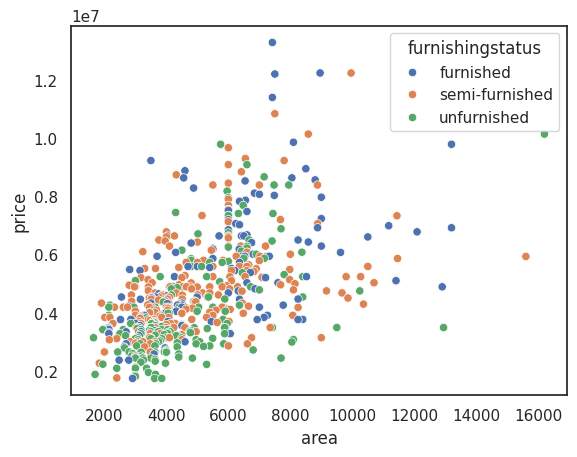

In [284]:
#Scatterplot between area(x) and price(y)
sns.scatterplot(y=house['price'],x=house['area'],hue=house['furnishingstatus'])

# 4. Feature Engineering


In [285]:
#Transform text to numerical

status = pd.get_dummies(house[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
house = pd.concat([house, status], axis = 1)
house.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

house.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


# 5. Models Evaluation

In [315]:
from sklearn.model_selection import train_test_split
X = house.drop(['price'],axis=1)
y = house['price']

#Spill data 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(436, 13)  <class 'pandas.core.frame.DataFrame'>
(436,) 	  <class 'pandas.core.series.Series'>
(109, 13)  <class 'pandas.core.frame.DataFrame'>
(109,) 	  <class 'pandas.core.series.Series'>


In [305]:
#Train model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #training process

#Predict
y_pred = lin_reg.predict(X_test)
print(y_pred)

[3828178.29805174 5681563.8421167  3038213.37264412 5571485.77392489
 2964692.68375648 4745495.72936885 5480729.44254118 5026248.24182038
 4157322.48361772 5252424.55482289 3024917.66858071 5258968.28934472
 3900817.32940955 7220164.15739206 4003260.42905549 4120921.34433775
 3133742.40904463 4997130.30626264 6335260.16299152 4787220.08127157
 2775625.3243319  6482261.12391156 2875914.83858821 7715283.40711003
 4176127.87004966 5904201.15301761 5035356.15327146 7146604.31629522
 3518236.65241398 2809490.16265543 5910778.43547112 4083028.79290496
 3719676.93609684 3325358.67655472 2599802.91757928 4110118.5399167
 3302016.05722444 3889255.19325663 3540201.33647386 3072114.01371605
 7973159.88827347 5395814.05593098 4223100.76375393 4192489.57946331
 8118247.40752689 5556437.72493718 2007674.80710041 5017390.40864407
 4759613.40467347 4098119.01568341 2187075.20737319 6870585.19817398
 2872471.21709689 3260143.38978226 3052699.27496082 5649363.0546073
 2707224.24753885 5393584.57313901 6

In [306]:
#Score of Model

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Square Erroe : {mse:.3f}")
print(f"R2 Score : {r2:.3f}")

Mean Absolute Error: 711820.677
Mean Square Erroe : 879399630140.544
R2 Score : 0.756


# 6. Deploy

In [289]:
# Download the saved model file

import pickle
from google.colab import files

pickle.dump(lin_reg, open('ml_6610412002.sav', 'wb'))
files.download('ml_6610412002.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [290]:
# Make predictions using the loaded model
with open('ml_6610412002.sav', 'rb') as file:
    saved_model = pickle.load(file)


predictions = saved_model.predict(X_test)
r2 = r2_score(y_test, predictions)

print("R2 Score:", r2)


R2 Score: 0.7564729508327055
